# **Modeling and hyperperameter Tununing**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import pickle
from Regression import Regression
from Ensemble import Ensemble
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_train = pd.read_csv('Data/2.x_train.csv')
x_val = pd.read_csv('Data/2.x_test.csv')
y_train = pd.read_csv('Data/2.y_train.csv')
y_val = pd.read_csv('Data/2.y_test.csv')

In [3]:
print(x_train.shape)
print(x_val.shape)

(1314, 21)
(145, 21)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold,RandomizedSearchCV
from sklearn.svm import SVR
import seaborn as sns
import math
import time

class Regression():
    def __init__(self,model_type,x_train,y_train,x_val,y_val,hyper_tuning_method = "grid"):
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        self.model_type = model_type
        self.hyper_tuning_method = hyper_tuning_method

        self.report = pd.DataFrame()
        if self.model_type == "Linear Regression":
            self.model = LinearRegression()
        elif self.model_type == 'Decision Tree Regression':
            self.model = DecisionTreeRegressor(random_state=42)
        elif self.model_type == 'Random Forest Regression':
            self.model = RandomForestRegressor()
        elif self.model_type == 'SVM Regression':
          self.model = SVR()
   
    def result(self):
       mse_t = mean_squared_error(self.y_train, self.y_true)
       mse_v = mean_squared_error(self.y_val, self.y_validated)
       mse = [mse_t,mse_v]
       rmse = [math.sqrt(mse_t),math.sqrt(mse_v)]
       df = pd.DataFrame({'MSE':mse,'RMSE':rmse},index=['train','validation'])
       return df
    def get_feature_importances(self):
 
        if (self.model_type == 'Decision Tree Regression') or (self.model_type == 'Random Forest Regression') or (self.model_type == 'SVM Regression'):    
            self.feature_importances_table = pd.DataFrame(self.best_model.feature_importances_,
                                                    index = self.x_train.columns,
                                                    columns=['Importance']).sort_values('Importance',ascending =False)
            plt.figure(figsize=(9,7.5))
            self.feature_importances_bar = sns.barplot(y= self.feature_importances_table.index[:15], x= self.feature_importances_table['Importance'][:15])
            plt.show()
            return self.feature_importances_bar  
        else:
            return print('This classification method does not have the attribute feature importance.')  
    def scores(self,best_model,value):
        self.score_table = pd.DataFrame()
        self.score_train = self.best_model.score(self.x_train,self.y_train)
        self.score_val = self.best_model.score(self.x_val,self.y_val)
        d = {'Model Name': [self.model_type],
             'Train Score': [self.score_train], 
             'Validation Score': [self.score_val],
             'Score Difference':[self.score_train-self.score_val]}
        self.scores_table = pd.DataFrame(data=d)
        return self.scores_table
    def show_kde(self):
        sns.kdeplot(self.y_val, self.y_validated, 
            color='r', shade=True, Label='Iris_Setosa', 
            cmap="Reds", shade_lowest=False) 
        
    def show(self):
        fig, ax = plt.subplots(1,1)
        labels = [] 
        for s in self.df:
            self.df[s].plot(kind='density',title = 'Distribuation of Actual value and Prediction Value',label=s)
            labels.append(s)
        plt.legend(labels)
        plt.show()
    def get_best_estimator(self):
        return opt_model.best_estimator_
    def get_scores(self,params,cv_type):
        start = time.time()
        model = self.model
        if self.hyper_tuning_method == "grid":
            opt_model = GridSearchCV(model,
                                 params,
                                 cv=cv_type,
                                 scoring='r2',
                                 return_train_score=True,
                                 n_jobs=-1)
        else:
             opt_mode = RandomizedSearchCV(model,
                                 params,
                                 cv=cv_type,
                                 scoring='r2',
                                 return_train_score=True,
                                 n_jobs=-1,
                                  n_iter=60)
        
        self.opt_model = opt_model.fit(self.x_train,self.y_train) 
       
        self.best_model = opt_model.best_estimator_
        value = opt_model.best_score_
        self.scores = self.scores(self.best_model,value)
        self.best_params = opt_model.best_params_
        display(self.scores_table)
        print()
        if params == {}:
            pass
        else:
            print("The best hyperparameters by {}searchCv are : ".format(self.hyper_tuning_method), self.best_params,'\n')
        self.y_validated = self.best_model.predict(self.x_val)

        self.y_true = self.best_model.predict(self.x_train)
        self.report = self.result()
        stop = time.time()
        
        print(f"time taken by hayper perameter for searching best perameter : {stop - start} s \n",)
        df = pd.DataFrame({'Actual':np.array(self.y_val).flatten(),'Prediction':np.array(self.y_validated).flatten()})
        self.df = df
        display(df[:5])
        return self.report


     

 

In [5]:


import pandas as pd
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor 
from sklearn.ensemble import GradientBoostingClassifier,StackingRegressor,VotingRegressor


class Ensemble(Regression):
    def __init__(self, ensemble_method,X_train, y_train, X_val, y_val,hyper_tuning_method = "grid"):
        self.ensemble_method = ensemble_method
        self.x_train = X_train
        self.y_train = y_train
        self.x_val = X_val
        self.y_val = y_val
        self.model_type = ensemble_method
        self.hyper_tuning_method = hyper_tuning_method
        self.scores_table = pd.DataFrame()
        self.estimators = None

        if self.ensemble_method == "XGBoost":
            self.model = XGBRegressor(n_jobs=-1)
        elif self.ensemble_method == "LightGbm":
            self.model = LGBMRegressor()
        elif self.ensemble_method == "Voting":
            self.model = VotingRegressor()  
        
    def Stacking(self,estimators):
        self.model = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=100,random_state=42))
        
        
    def Voting(self,estimators):
        self.model = VotingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))


    



## **Linear Regression (Baselinne)**

In [ ]:
model1 = Regression('Linear Regression',x_train , y_train,x_val, y_val)
model1.get_scores({},5)

,Model Name,Train Score,Validation Score,Score Difference
0,Linear Regression,0.898866,0.880952,0.017914



time taken by hayper perameter for searching best perameter : 0.16159772872924805 s 



,Actual,Prediction
0,12.209188,12.278635
1,11.798104,12.008081
2,11.608236,11.709233
3,12.165251,12.271068
4,11.385092,11.427390


,MSE,RMSE
train,0.016379,0.127981
validation,0.016382,0.127992


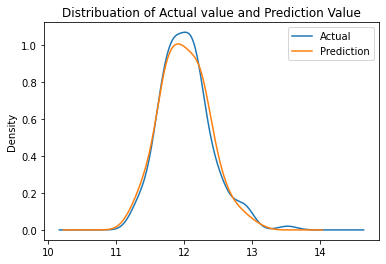

In [ ]:
model1.show()

## **DecisionTreeRegressor**

In [ ]:
params = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128]
}


In [ ]:
tree_1 = Regression('Decision Tree Regression',x_train , y_train,x_val, y_val)
tree_1.get_scores(params,5)

,Model Name,Train Score,Validation Score,Score Difference
0,Decision Tree Regression,0.899665,0.782997,0.116668



The best hyperparameters by gridsearchCv are :  {'max_depth': 12, 'max_features': 0.4, 'max_leaf_nodes': 128, 'min_samples_split': 30} 

time taken by hayper perameter for searching best perameter : 18.950525283813477 s 



,Actual,Prediction
0,12.209188,12.636834
1,11.798104,11.882753
2,11.608236,11.652063
3,12.165251,12.446427
4,11.385092,11.392815


,MSE,RMSE
train,0.016250,0.127474
validation,0.029861,0.172804


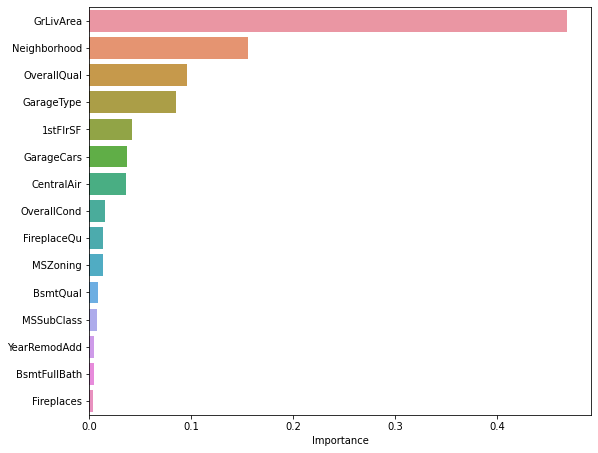

In [ ]:
tree_1.get_feature_importances()

### **2nd Attempt**

In [ ]:
params = {
    'max_depth': [11, 12,13,14,15,16],
    'min_samples_split': [25,27,29,31,33,35],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [100,110,128,135,150]
}

In [ ]:
tree_2 = Regression('Decision Tree Regression',x_train , y_train,x_val, y_val)
tree_2.get_scores(params,5)

,Model Name,Train Score,Validation Score,Score Difference
0,Decision Tree Regression,0.902531,0.816456,0.086074



The best hyperparameters by gridsearchCv are :  {'max_depth': 11, 'max_features': 0.4, 'max_leaf_nodes': 100, 'min_samples_split': 29} 

time taken by hayper perameter for searching best perameter : 27.5280921459198 s 



,Actual,Prediction
0,12.209188,12.636834
1,11.798104,11.882753
2,11.608236,11.766439
3,12.165251,12.446427
4,11.385092,11.392815


,MSE,RMSE
train,0.015786,0.125641
validation,0.025257,0.158925


### **3rd Attempt**

In [ ]:
params = {
    'max_depth': [9,10,11,12],
    'min_samples_split': [25,27,29,31,33,35],
    'max_features': [0.3,0.35,0.4,0.45,0.5],
    'max_leaf_nodes': [90,100,110,120,130]
}

In [ ]:
tree_3 = Regression('Decision Tree Regression',x_train , y_train,x_val, y_val)
tree_3.get_scores(params,5)

,Model Name,Train Score,Validation Score,Score Difference
0,Decision Tree Regression,0.900896,0.812894,0.088002



The best hyperparameters by gridsearchCv are :  {'max_depth': 11, 'max_features': 0.4, 'max_leaf_nodes': 90, 'min_samples_split': 29} 

time taken by hayper perameter for searching best perameter : 18.293215036392212 s 



,Actual,Prediction
0,12.209188,12.636834
1,11.798104,11.882753
2,11.608236,11.766439
3,12.165251,12.446427
4,11.385092,11.392815


,MSE,RMSE
train,0.016050,0.12669
validation,0.025747,0.16046


## **SVM Regression**

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','poly']}

In [ ]:

svm_1 = Regression('SVM Regression',x_train, y_train, x_val, y_val)

In [ ]:
svm_1.get_scores(param_grid,5)

,Model Name,Train Score,Validation Score,Score Difference
0,SVM Regression,0.901144,0.88816,0.012984



The best hyperparameters by gridsearchCv are :  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} 

time taken by hayper perameter for searching best perameter : 236.89763879776 s 



,Actual,Prediction
0,12.209188,12.269604
1,11.798104,12.006733
2,11.608236,11.715443
3,12.165251,12.255735
4,11.385092,11.445123


,MSE,RMSE
train,0.01601,0.126531
validation,0.01539,0.124057


In [ ]:
param_grid = {'C': [8,9,10,11,12,15],  
              'gamma': [0.01,0.03,0.05,0.07,0.09], 
              'kernel': ['rbf']}

In [ ]:

svm_2 = Regression('SVM Regression',x_train, y_train, x_val, y_val)

In [ ]:
svm_2.get_scores(param_grid,5)

,Model Name,Train Score,Validation Score,Score Difference
0,SVM Regression,0.914026,0.891452,0.022574



The best hyperparameters by gridsearchCv are :  {'C': 8, 'gamma': 0.05, 'kernel': 'rbf'} 

time taken by hayper perameter for searching best perameter : 11.470091581344604 s 



,Actual,Prediction
0,12.209188,12.249964
1,11.798104,12.030175
2,11.608236,11.680111
3,12.165251,12.274479
4,11.385092,11.431210


,MSE,RMSE
train,0.013924,0.118000
validation,0.014937,0.122217


In [ ]:
param_grid = {'C': [5,6,7,8,9],  
              'gamma': [0.03,0.04,0.05,0.06], 
              'kernel': ['rbf']}

In [ ]:

svm_3 = Regression('SVM Regression',x_train, y_train, x_val, y_val)

In [ ]:
svm_3.get_scores(param_grid,5)

,Model Name,Train Score,Validation Score,Score Difference
0,SVM Regression,0.913282,0.890201,0.02308



The best hyperparameters by gridsearchCv are :  {'C': 5, 'gamma': 0.06, 'kernel': 'rbf'} 

time taken by hayper perameter for searching best perameter : 7.043693542480469 s 



,Actual,Prediction
0,12.209188,12.252994
1,11.798104,12.029178
2,11.608236,11.683765
3,12.165251,12.272317
4,11.385092,11.431496


,MSE,RMSE
train,0.014044,0.118509
validation,0.015109,0.122919


## **Random Forest Regressor**

In [ ]:
n_estimators = [10,20,40,60,80,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,7,8,9,11,12,]

# Minimum number of samples required to split a node
min_samples_split = [5,8,12,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,15,20,25]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
ran_for_1 = Regression('Random Forest Regression',x_train , y_train,x_val, y_val)
ran_for_1.get_scores(random_grid,3)

,Model Name,Train Score,Validation Score,Score Difference
0,Random Forest Regression,0.909441,0.876788,0.032653



The best hyperparameters by gridsearchCv are :  {'bootstrap': False, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 60} 

time taken by hayper perameter for searching best perameter : 867.9922304153442 s 



,Actual,Prediction
0,12.209188,12.245962
1,11.798104,11.887788
2,11.608236,11.711830
3,12.165251,12.267734
4,11.385092,11.486636


,MSE,RMSE
train,0.014667,0.121105
validation,0.016955,0.130211


In [ ]:
n_estimators = [100,200,300,400,500]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [11,12,13,14,15]

# Minimum number of samples required to split a node
min_samples_split = [7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,15,20,30]
# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
ran_for_2 = Regression('Random Forest Regression',x_train , y_train,x_val, y_val)
ran_for_2.get_scores(random_grid,5)

,Model Name,Train Score,Validation Score,Score Difference
0,Random Forest Regression,0.912372,0.881365,0.031007



The best hyperparameters by gridsearchCv are :  {'bootstrap': False, 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 400} 

time taken by hayper perameter for searching best perameter : 821.3944976329803 s 



,Actual,Prediction
0,12.209188,12.236315
1,11.798104,11.897506
2,11.608236,11.726923
3,12.165251,12.260697
4,11.385092,11.486016


,MSE,RMSE
train,0.014192,0.119129
validation,0.016325,0.127770


## **XGBoost**

In [ ]:
params = {"eta":[0.01,0.05,0.2],
          "eval_metric":['rmse'],
         "max_depth" : [ 5,8,12,15],
         "min_child_weight" : [ 1, 3, 5, 7 ],
         "gamma"   : [ 0.0,0.3,0.4 ],
         "colsample_bytree" : [ 0.3,0.5,0.7 ]}


In [ ]:
xgboost_1 = Ensemble('XGBoost',x_train , y_train,x_val, y_val)
xgboost_1.get_scores(params,5)

[04:30:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model Name,Train Score,Validation Score,Score Difference
0,XGBoost,0.980347,0.881575,0.098772



The best hyperparameters are:  {'colsample_bytree': 0.3, 'eta': 0.01, 'eval_metric': 'rmse', 'gamma': 0.0, 'max_depth': 8, 'min_child_weight': 3} 

time taken by hayper perameter for searching best perameter : 278.15272283554077 s 



,Actual,Prediction
0,12.209188,12.244984
1,11.798104,11.941896
2,11.608236,11.669693
3,12.165251,12.299916
4,11.385092,11.481414


,MSE,RMSE
train,0.003183,0.056417
validation,0.016296,0.127657


In [ ]:
params = {"eta":[0.001,0.005,0.1],
         "n_estimators":[100,200,500],
         "max_depth" : [ 6,7,8,9],
         "min_child_weight" : [ 2,3,4 ],
         "gamma"   : [ 0.0,0.1,0.2 ],
         "colsample_bytree" : [ 0.3,0.4]}

In [ ]:
xgboost_2 = Ensemble('XGBoost',x_train , y_train,x_val, y_val)
xgboost_2.get_scores(params,5)

[11:13:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model Name,Train Score,Validation Score,Score Difference
0,XGBoost,0.980656,0.887675,0.092981



The best hyperparameters by gridsearchCv are :  {'colsample_bytree': 0.4, 'eta': 0.001, 'gamma': 0.0, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 100} 

time taken by hayper perameter for searching best perameter : 805.4213712215424 s 



,Actual,Prediction
0,12.209188,12.313563
1,11.798104,11.980209
2,11.608236,11.606335
3,12.165251,12.287334
4,11.385092,11.448087


,MSE,RMSE
train,0.003133,0.055972
validation,0.015457,0.124325


## **Light GBM**

In [ ]:
rs_params = {
        'learning_rate':[0.0001, 0.001, 0.01],
        'bagging_fraction': [0.5,0.55,0.6,0.7,0.8],
        'bagging_frequency': [5,6,7,8],
        'feature_fraction': [0.5,0.6, 0.66, 0.7],
        'min_data_in_leaf': [90,110,120,130],
        'num_leaves': [1200, 1550],
        'max_depth': [10,12,14,15,17],


}

In [ ]:
light_gbm_1 = Ensemble('LightGbm',x_train, y_train, x_val, y_val)

In [ ]:
light_gbm_1.get_scores(rs_params,5)

,Model Name,Train Score,Validation Score,Score Difference
0,LightGbm,0.693234,0.704906,-0.011673



The best hyperparameters by gridsearchCv are :  {'bagging_fraction': 0.5, 'bagging_frequency': 5, 'feature_fraction': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'min_data_in_leaf': 90, 'num_leaves': 1200} 

time taken by hayper perameter for searching best perameter : 1907.081732749939 s 



,Actual,Prediction
0,12.209188,12.118587
1,11.798104,11.929585
2,11.608236,11.786996
3,12.165251,12.217284
4,11.385092,11.702131


,MSE,RMSE
train,0.049682,0.222895
validation,0.040607,0.201512


In [ ]:
rs_params = {
        'learning_rate':[0.01,0.03,0.05,0.07],
        'bagging_fraction': [0.3,0.45,0.55,0.6],
        'bagging_frequency': [3,4,5],
        'feature_fraction': [0.6,0.66,0.7,0.77],
        'min_data_in_leaf': [50,60,70,80],
        'max_depth': [7,8,9,10],


}

In [ ]:
light_gbm_2 = Ensemble('LightGbm',x_train, y_train, x_val, y_val)
light_gbm_2.get_scores(rs_params,5)

,Model Name,Train Score,Validation Score,Score Difference
0,LightGbm,0.934434,0.882394,0.05204



The best hyperparameters by gridsearchCv are :  {'bagging_fraction': 0.3, 'bagging_frequency': 3, 'feature_fraction': 0.66, 'learning_rate': 0.07, 'max_depth': 10, 'min_data_in_leaf': 50} 

time taken by hayper perameter for searching best perameter : 679.8883175849915 s 



,Actual,Prediction
0,12.209188,12.254009
1,11.798104,11.948292
2,11.608236,11.590265
3,12.165251,12.309612
4,11.385092,11.398331


,MSE,RMSE
train,0.010619,0.103047
validation,0.016183,0.127214


In [ ]:
rs_params = {
        'learning_rate':[0.06,0.07,0.075,0.8],
        'bagging_fraction': [0.2,0.25,0.3],
        'bagging_frequency': [2,3,4],
        'feature_fraction': [0.6,0.62,0.65,0.68],
        'min_data_in_leaf': [30,40,50],
        'max_depth': [10]}

In [ ]:
light_gbm_3 = Ensemble('LightGbm',x_train, y_train, x_val, y_val)
light_gbm_3.get_scores(rs_params,5)

,Model Name,Train Score,Validation Score,Score Difference
0,LightGbm,0.946963,0.879213,0.067749



The best hyperparameters by gridsearchCv are :  {'bagging_fraction': 0.2, 'bagging_frequency': 2, 'feature_fraction': 0.6, 'learning_rate': 0.06, 'max_depth': 10, 'min_data_in_leaf': 30} 

time taken by hayper perameter for searching best perameter : 120.69190859794617 s 



,Actual,Prediction
0,12.209188,12.317378
1,11.798104,11.919355
2,11.608236,11.524381
3,12.165251,12.312403
4,11.385092,11.429214


,MSE,RMSE
train,0.008590,0.092680
validation,0.016621,0.128923


In [ ]:
 from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
 class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
           
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [ ]:
lgbm2 = LGBMRegressor(bagging_fraction=0.3, bagging_frequency=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.66,
              importance_type='split', learning_rate=0.07, max_depth=10,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=50,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)
xgboost2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, eta=0.001, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=2, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
model = LinearRegression()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
stacked_averaged_models.fit(x_train.values, y_train.values)
stacked_train_pred = stacked_averaged_models.predict(x_train.values)
stacked_pred = stacked_averaged_models.predict(x_val.values)
print("validation rmse ::",rmsle(y_val.values, stacked_pred))    

djdjd
djdjd
[11:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
validation rmse :: 0.12464816870299592


## **All Models Compared**

In [ ]:
all_models = pd.concat([model1.scores_table,
                        tree_2.scores_table,
                        ran_for_2.scores_table,
                        svm_2.scores_table,
                        xgboost_2.scores_table,
                        light_gbm_2.scores_table],
                        axis=0)

In [ ]:
all_models

,Model Name,Train Score,Validation Score,Score Difference
0,Linear Regression,0.898866,0.880952,0.017914
0,Decision Tree Regression,0.902531,0.816456,0.086074
0,Random Forest Regression,0.912372,0.881365,0.031007
0,SVM Regression,0.914026,0.891452,0.022574
0,XGBoost,0.980656,0.887675,0.092981
0,LightGbm,0.934434,0.882394,0.052040
